In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 16,8
rcParams['figure.dpi'] = 200

In [60]:
# spotify dataset of the top 2000 tracks from the years 2000-2019
df = pd.read_csv('songs_normalize.csv')

In [61]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [63]:
# missing data?
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [64]:
# the 'explicit' column is boolean -- convert it to a character of 'yes' and 'no'
explicits = {True: 'yes', False: 'no'}
df['explicit'] = df['explicit'].map(explicits)

In [65]:
# top 25 artists
df['artist'].value_counts()[:25]

Rihanna              25
Drake                23
Eminem               21
Calvin Harris        20
Britney Spears       19
David Guetta         18
Chris Brown          17
Kanye West           17
Taylor Swift         16
Katy Perry           16
Beyoncé              16
P!nk                 15
Black Eyed Peas      14
Ariana Grande        14
Coldplay             13
Jason Derulo         13
Maroon 5             13
Justin Timberlake    12
JAY-Z                12
Bruno Mars           12
Usher                11
Flo Rida             11
Lady Gaga            11
Nelly                11
Jennifer Lopez       10
Name: artist, dtype: int64

In [66]:
# how many songs does eminem have on the list, and which ones are the most popular?
df[df['artist'] == 'Eminem'].sort_values('popularity', ascending = False)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
201,Eminem,Without Me,290320,yes,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.6620,112.238,hip hop
6,Eminem,The Real Slim Shady,284200,yes,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,hip hop
209,Eminem,'Till I Collapse,297786,yes,2002,85,0.548,0.847,1,-3.237,1,0.1860,0.06220,0.000000,0.0816,0.1000,171.447,hip hop
102,Eminem,Stan,404106,yes,2000,83,0.780,0.768,6,-4.325,0,0.2380,0.03710,0.000002,0.5180,0.5070,80.063,hip hop
1001,Eminem,Love The Way You Lie,263373,yes,2010,81,0.749,0.925,10,-5.034,1,0.2270,0.24100,0.000000,0.5200,0.6410,86.989,hip hop
1022,Eminem,Not Afraid,248133,yes,2010,79,0.855,0.954,0,-1.190,0,0.2640,0.52900,0.000000,0.2050,0.6680,114.635,hip hop
535,Eminem,Mockingbird,250760,yes,2004,77,0.637,0.678,0,-3.798,1,0.2660,0.20900,0.000000,0.1560,0.2540,84.039,hip hop
302,Eminem,"Lose Yourself - From ""8 Mile"" Soundtrack",322226,yes,2004,77,0.686,0.735,2,-4.616,1,0.2640,0.00921,0.000660,0.3420,0.0596,171.355,hip hop
1328,Eminem,The Monster,250188,yes,2013,75,0.781,0.853,1,-3.680,0,0.0715,0.05250,0.000000,0.1200,0.6240,110.049,hip hop
619,Eminem,Shake That,274440,yes,2005,74,0.963,0.643,1,-5.785,0,0.1170,0.05070,0.000049,0.1570,0.5340,107.005,hip hop


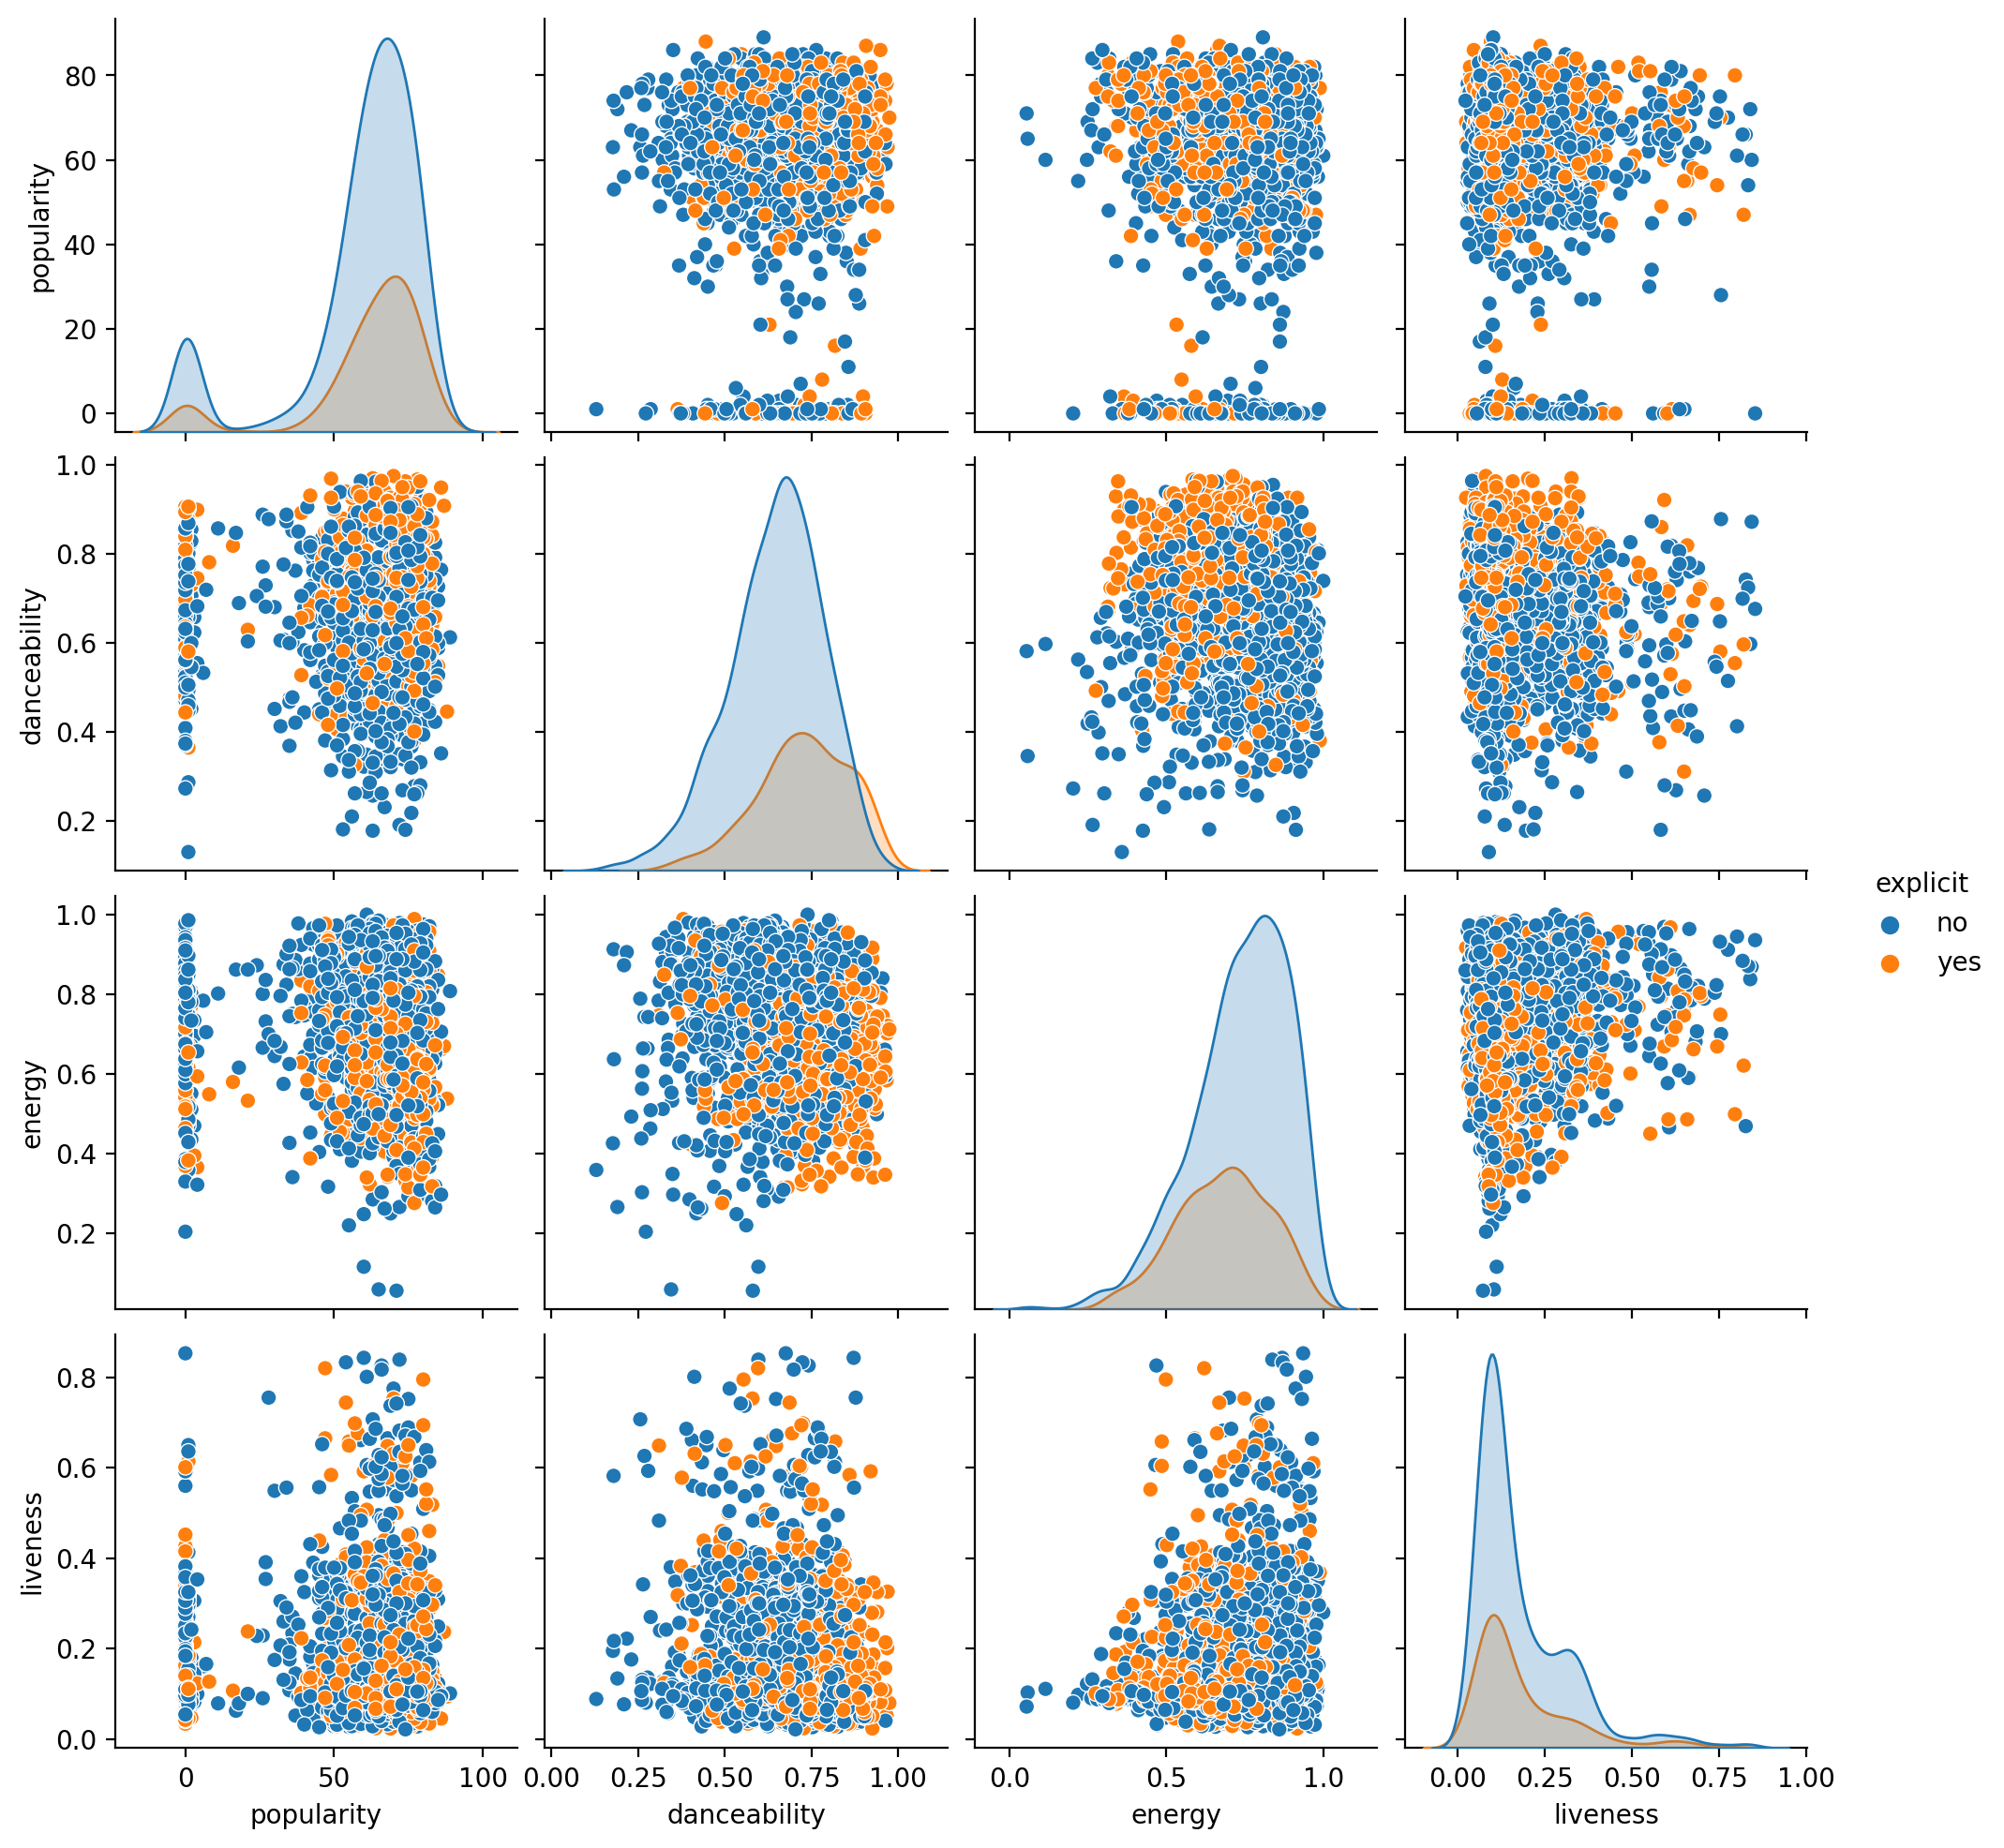

In [74]:
# there are a few ratings that seem objective
# for starters, how do danceability, energy, and liveness relate to popularity?
sns.pairplot(data = df[['popularity', 'danceability', 'energy', 'liveness', 'explicit']],
             hue = 'explicit');

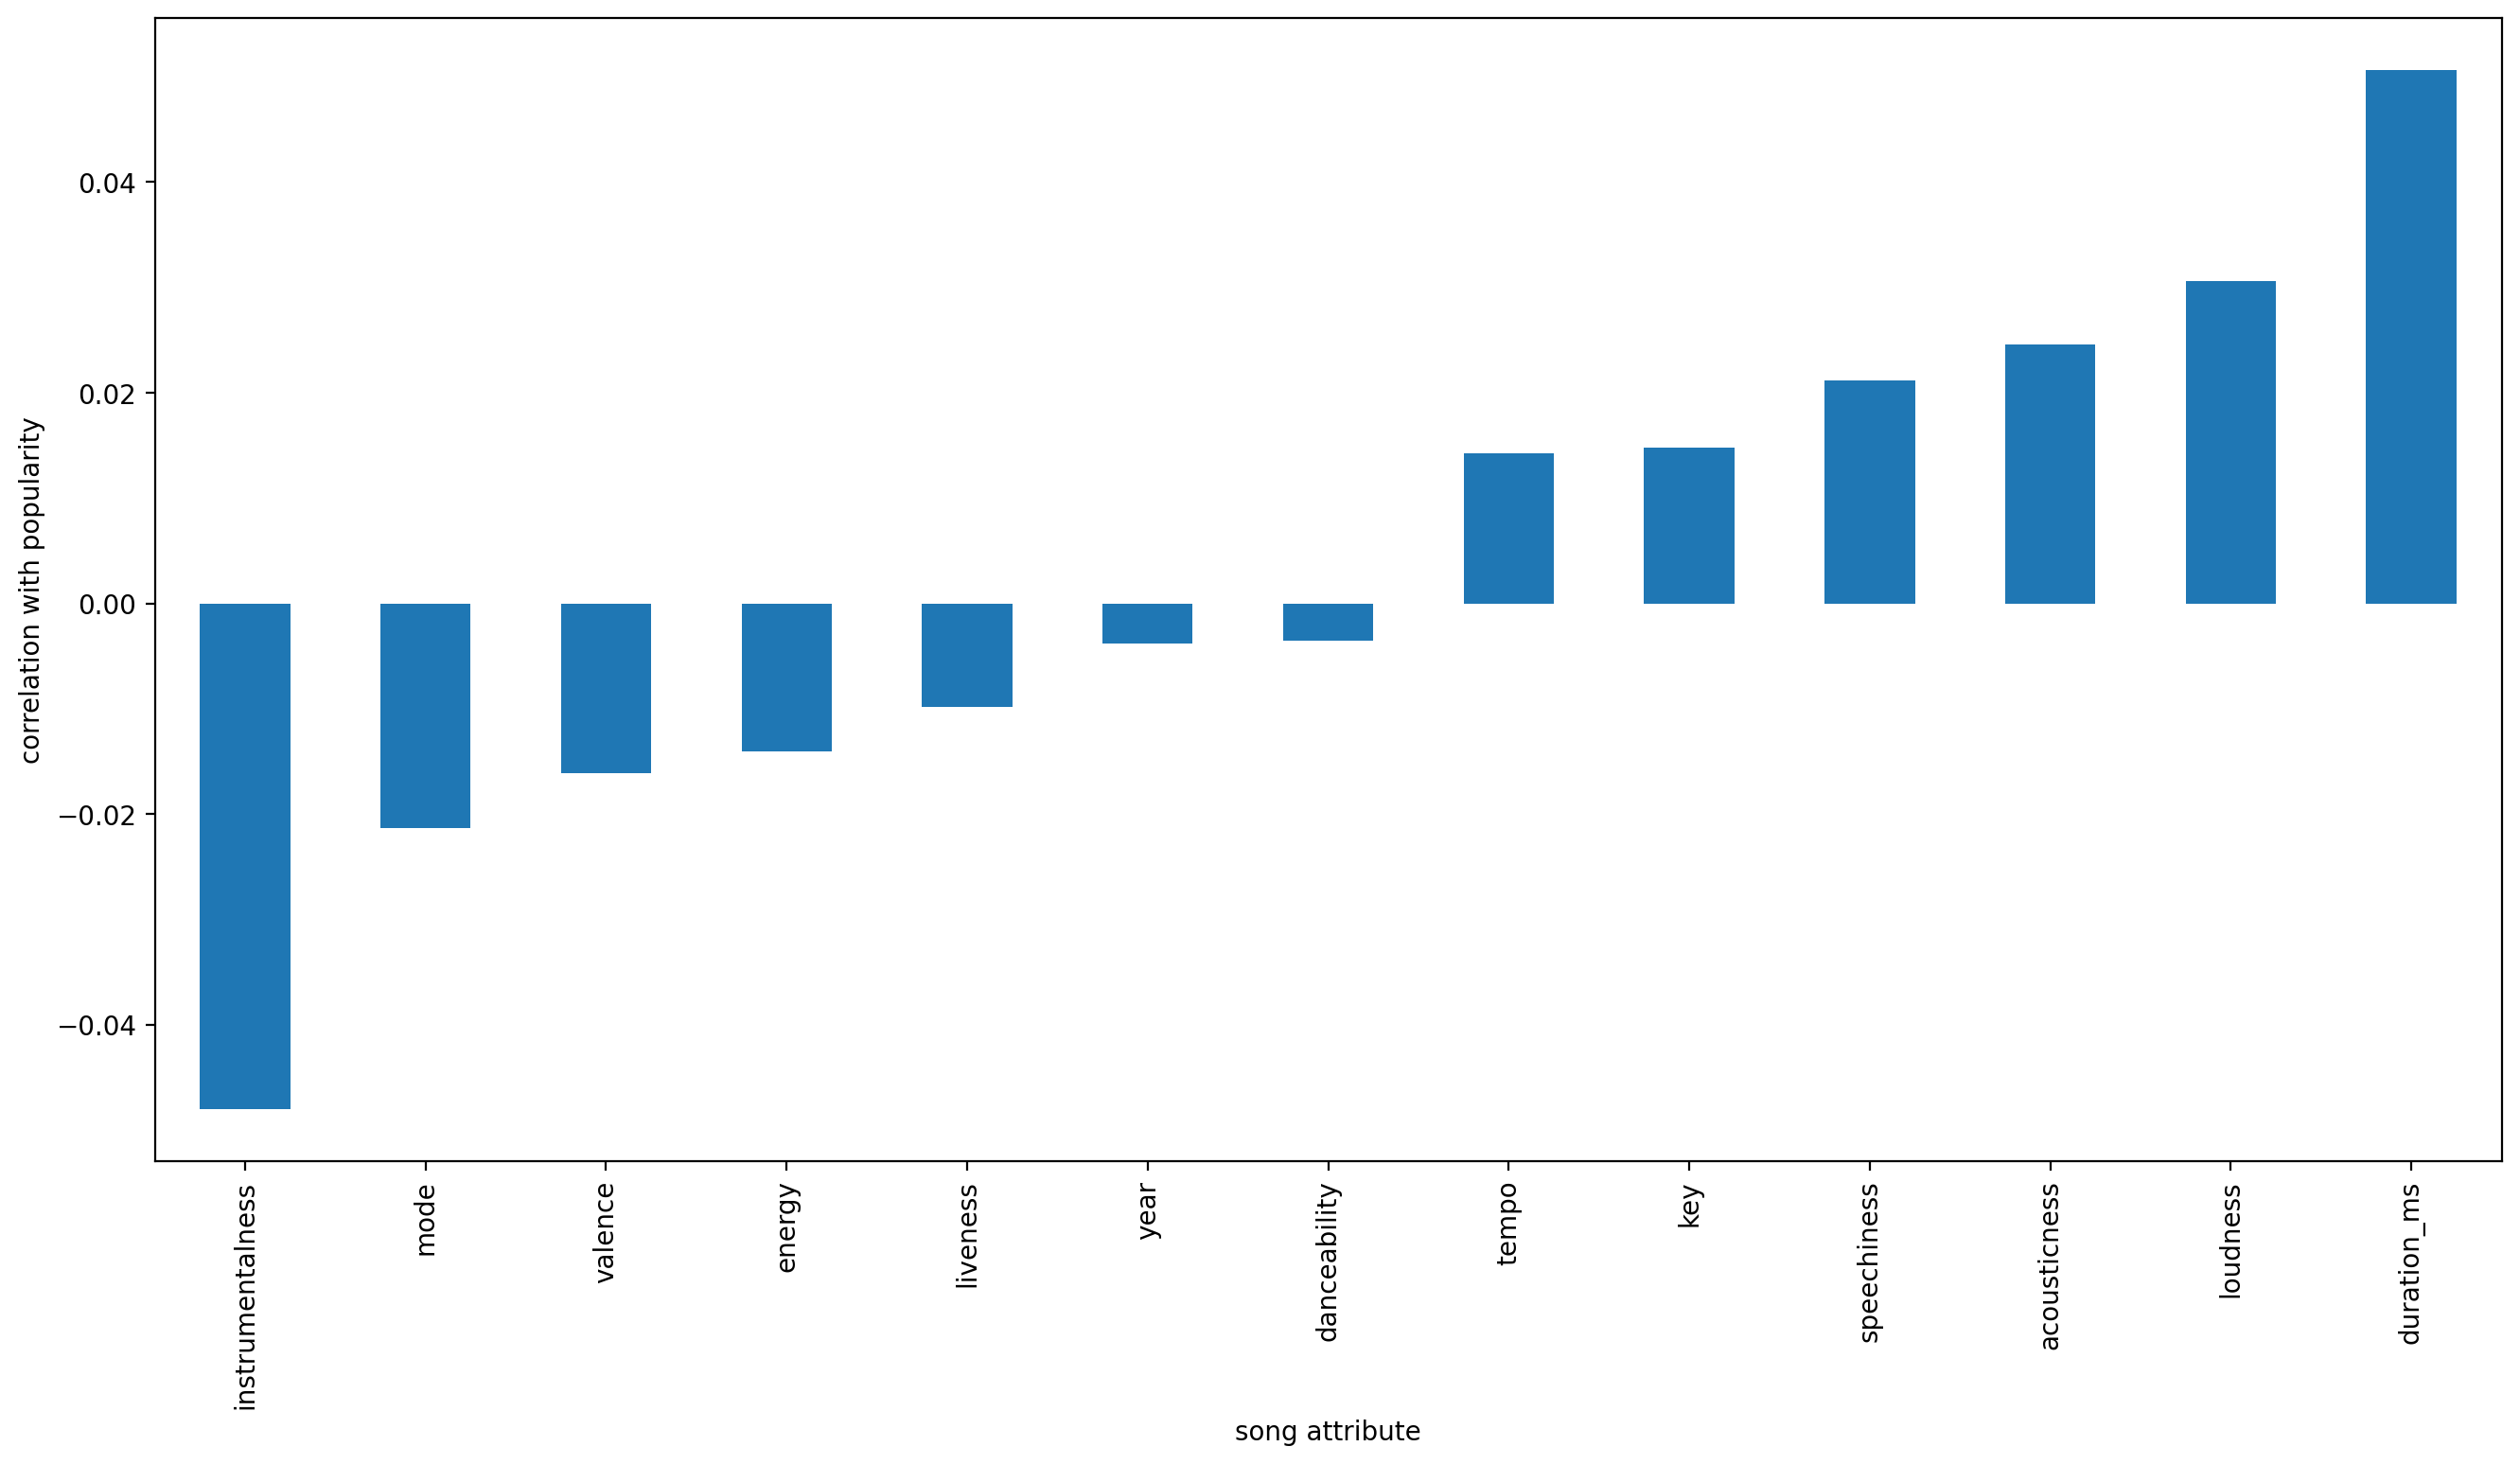

In [83]:
# how do the continuous variables relate to popularity?
corrs = df.corr()
corrsPop = corrs['popularity'].sort_values()[:-1].plot(kind = 'bar');

plt.xlabel('song attribute');
plt.ylabel('correlation with popularity');

In [89]:
# how many genres are listed?
df['genre'].value_counts()

pop                                      428
hip hop, pop                             277
hip hop, pop, R&B                        244
pop, Dance/Electronic                    221
pop, R&B                                 178
hip hop                                  124
hip hop, pop, Dance/Electronic            78
rock                                      58
rock, pop                                 43
Dance/Electronic                          41
rock, metal                               38
pop, latin                                28
pop, rock                                 26
set()                                     22
hip hop, Dance/Electronic                 16
latin                                     15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               13
country                                   10
hip hop, pop, rock                         9
metal     

In [84]:
# for now, let's leave out the artist/song name variables (also year)
# keep the focus on aspects of the song that predict popularity

In [85]:
dfx = df.drop(['artist', 'song', 'year'], axis = 1)

In [86]:
# now create dummy codes for the two remaining categorical variables (explicit and genre)
dfx = pd.get_dummies(dfx)

In [87]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 74 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   duration_ms                                  2000 non-null   int64  
 1   popularity                                   2000 non-null   int64  
 2   danceability                                 2000 non-null   float64
 3   energy                                       2000 non-null   float64
 4   key                                          2000 non-null   int64  
 5   loudness                                     2000 non-null   float64
 6   mode                                         2000 non-null   int64  
 7   speechiness                                  2000 non-null   float64
 8   acousticness                                 2000 non-null   float64
 9   instrumentalness                             2000 non-null   float64
 10  

In [90]:
# run a regression algorithm to predict song popularity
# for regularization, use lasso;
# the correlational analyses suggest that it's likely that many features won't be useful as predictors of popularity

In [91]:
# start by splitting the data into features and outcomes
X = dfx.drop('popularity', axis = 1)
y = df['popularity']

In [92]:
# do the train/test split
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = .2, random_state = 147)

In [93]:
# scale the features of the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xTrainSc = scaler.fit_transform(xTrain)
xTestSc = scaler.transform(xTest)

In [96]:
# import and fit the regression model
from sklearn.linear_model import LassoCV

In [97]:
mod = LassoCV(eps = .1, n_alphas = 100, cv = 5)

In [98]:
mod.fit(xTrainSc, yTrain)

LassoCV(cv=5, eps=0.1)

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [104]:
preds = mod.predict(xTestSc)

In [105]:
mean_absolute_error(yTest, preds)

14.27963386203276

In [106]:
np.sqrt(mean_squared_error(yTest, preds))

20.641560642854778

In [117]:
# what were the most important predictors?
predictors = pd.DataFrame(data = mod.coef_, index = X.columns, columns = ['Coefficient'])
predictors = predictors.sort_values('Coefficient')
predictors

,Coefficient
"genre_pop, Dance/Electronic",-1.369614
"genre_Folk/Acoustic, rock",-0.927708
"genre_World/Traditional, rock, pop",-0.922079
"genre_country, latin",-0.918502
"genre_pop, rock, Dance/Electronic",-0.559089
...,...
"genre_rock, pop",0.554615
genre_hip hop,0.798203
genre_rock,0.956504
"genre_rock, metal",0.996955


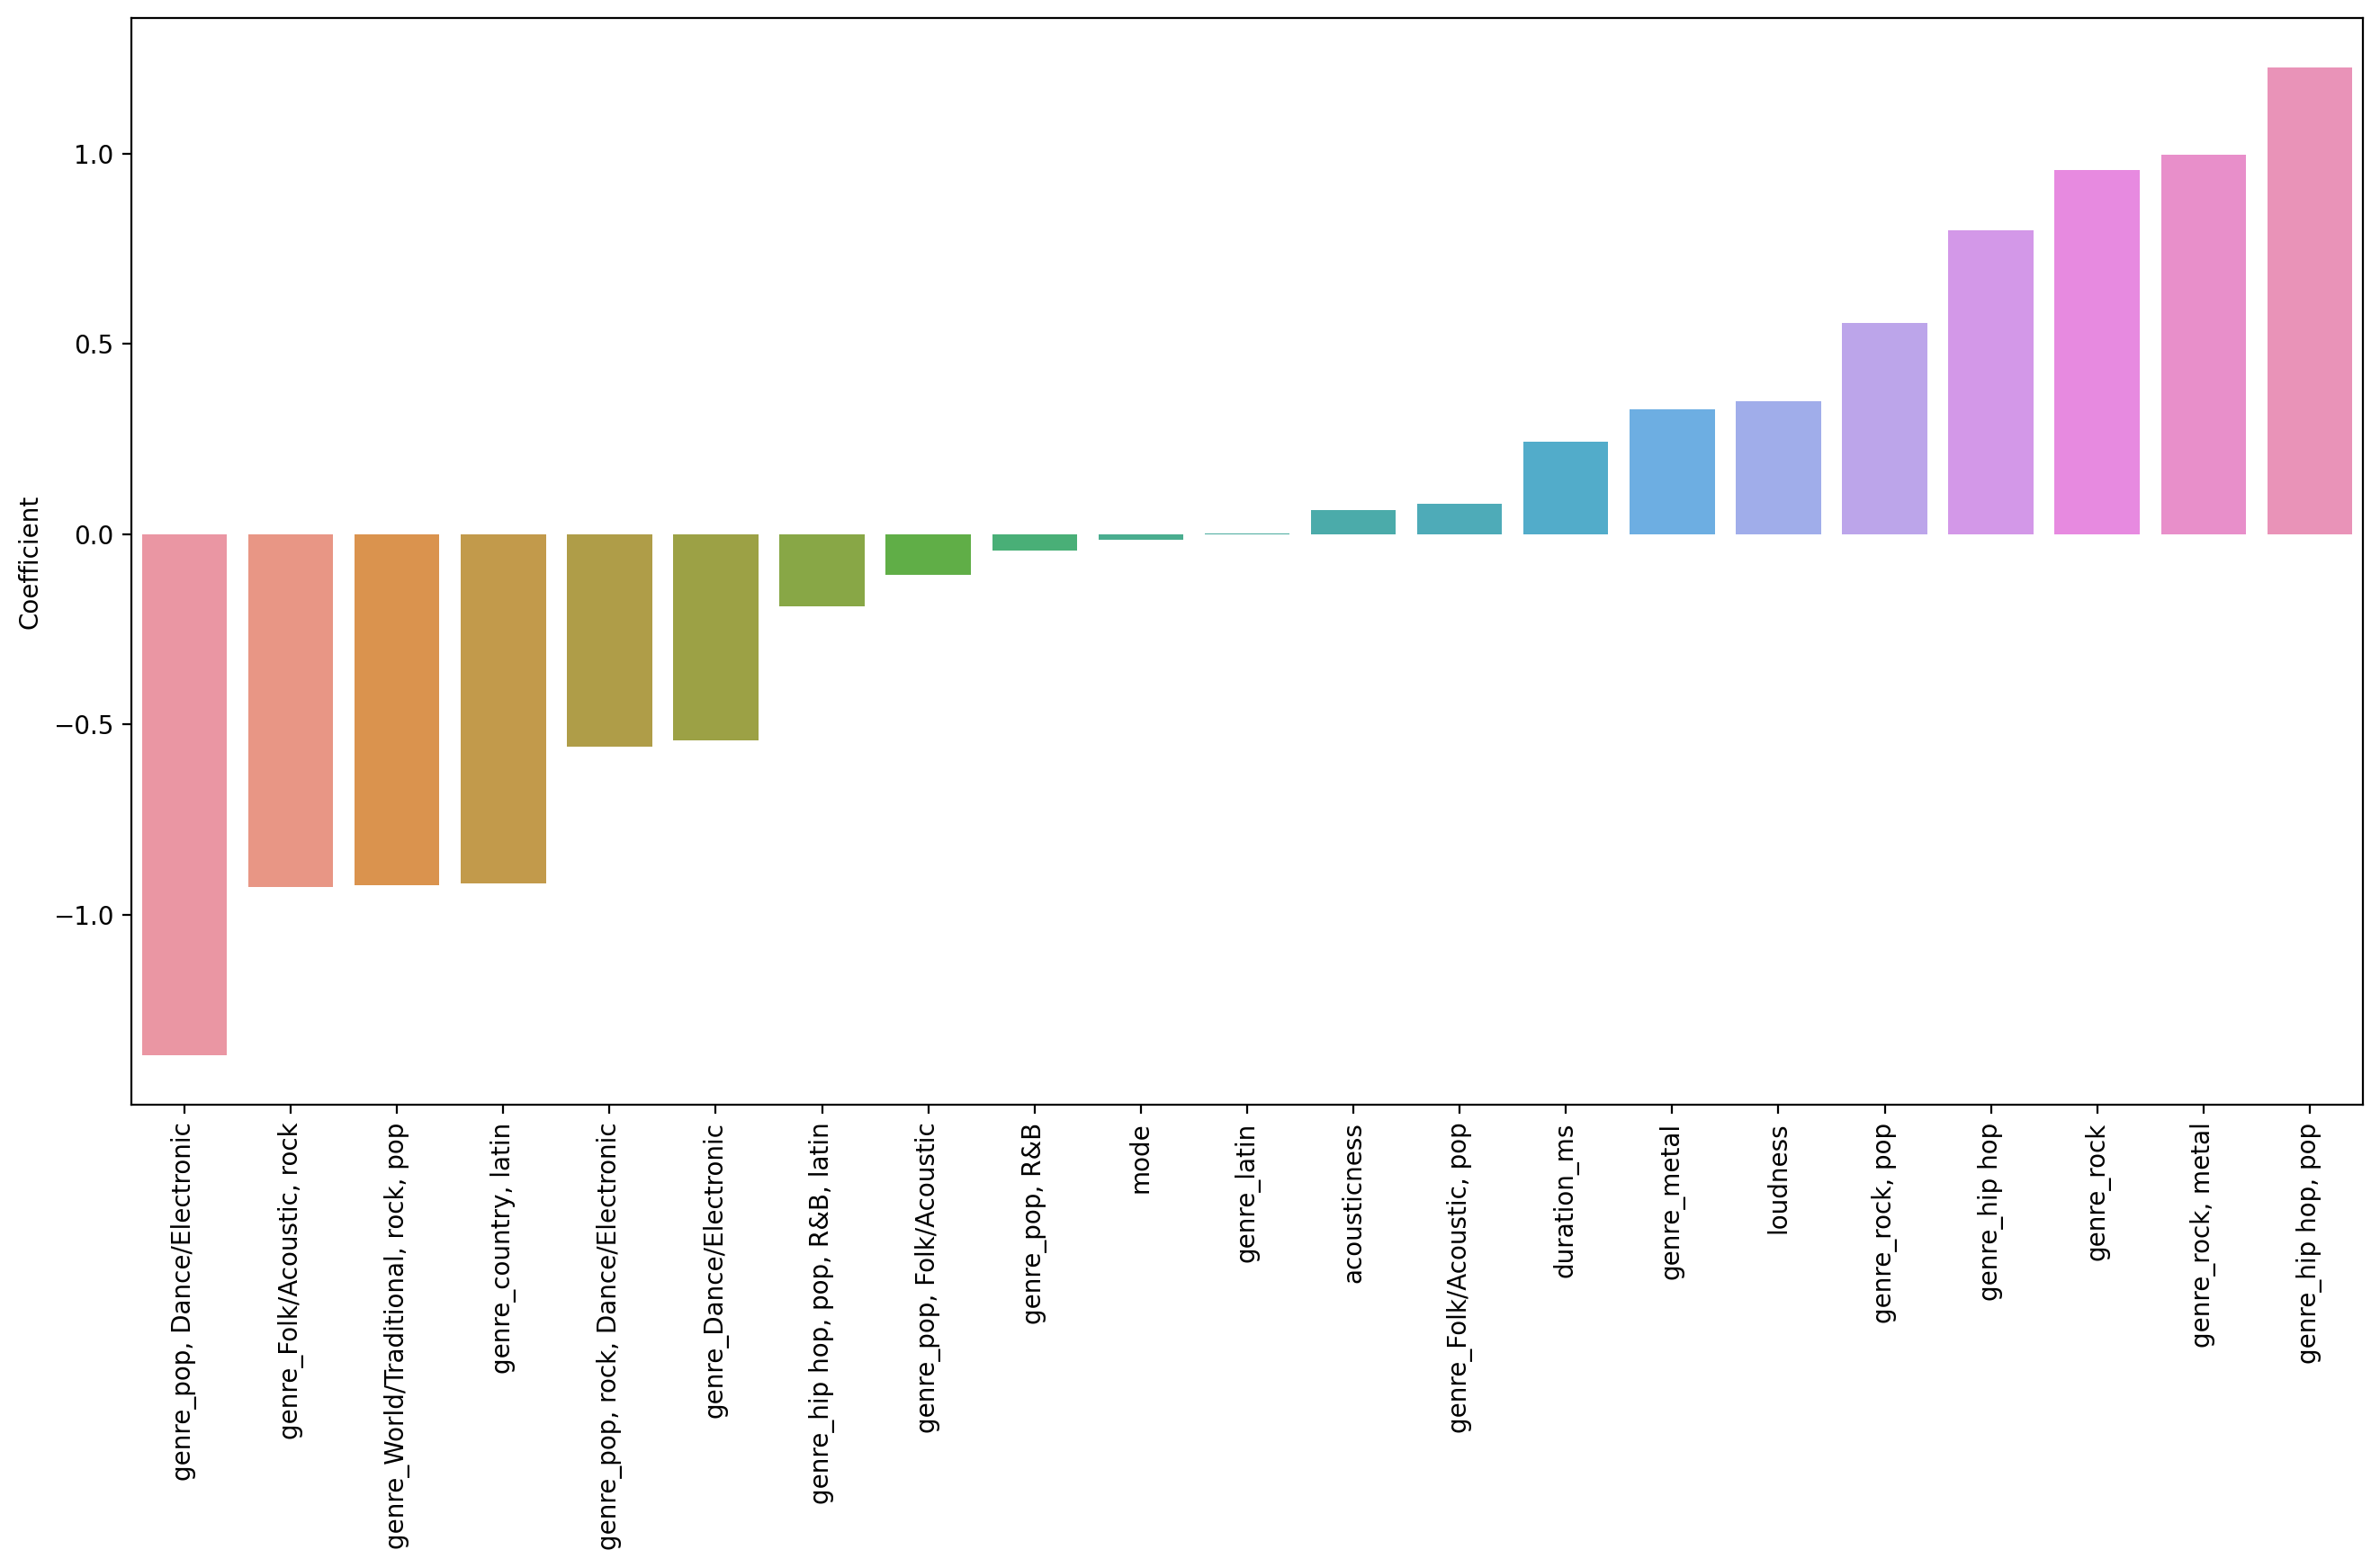

In [124]:
# visualize coefficient importances
nonZeros = predictors[predictors['Coefficient'] != 0]

sns.barplot(data = nonZeros,
            x = nonZeros.index,
            y = 'Coefficient');

plt.xticks(rotation = 90);

In [125]:
# so these results are from the regression model, but should be interpreted with caution
# the model had a high degree of error
# it's possible that different ML algorithms could provide a better fit to the data

In [132]:
# create a regression helper function to streamline the process

def regHelper(model, xTrainSc, xTestSc, yTrain, yTest):
    # fit the model
    model.fit(xTrainSc, yTrain)

    # get model predictions
    preds = model.predict(xTestSc)

    # get model performance metrics
    mae = mean_absolute_error(yTest, preds)
    rmse = np.sqrt(mean_squared_error(yTest, preds))

    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')

In [144]:
# try an elastic net model
# use a few different l1 ratios
from sklearn.linear_model import ElasticNetCV

enMod = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, 1], tol = .01)
regHelper(enMod, xTrainSc, xTestSc, yTrain, yTest)

Mean Absolute Error: 14.280386579555497
Root Mean Squared Error: 20.639277026005395


In [134]:
# try a knn regression
from sklearn.neighbors import KNeighborsRegressor

kVals = [1, 5, 10, 15, 20]

for k in kVals:
    knnMod = KNeighborsRegressor(n_neighbors = k)

    print(f'K-nearest neghbors: {k}')
    regHelper(knnMod, xTrainSc, xTestSc, yTrain, yTest)

K-nearest neghbors: 1
Mean Absolute Error: 18.6125
Root Mean Squared Error: 29.27682530603344
K-nearest neghbors: 5
Mean Absolute Error: 16.073
Root Mean Squared Error: 22.423652690853025
K-nearest neghbors: 10
Mean Absolute Error: 14.907
Root Mean Squared Error: 21.31721721989059
K-nearest neghbors: 15
Mean Absolute Error: 14.601333333333333
Root Mean Squared Error: 21.03824823717243
K-nearest neghbors: 20
Mean Absolute Error: 14.46625
Root Mean Squared Error: 20.957906622561328


In [138]:
# now do a support vector regression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

paramGrid = {'C': [.01, .1, 1, 5, 10, 100, 1000],
            'gamma': ['auto', 'scale']}

gridSV = GridSearchCV(svr, paramGrid)

regHelper(gridSV, xTrainSc, xTestSc, yTrain, yTest)

Mean Absolute Error: 13.42235230756373
Root Mean Squared Error: 21.56790221477193


In [139]:
# what about boosted tree models?

In [140]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [141]:
# adaboost model
adaMod = AdaBoostRegressor()
regHelper(adaMod, xTrainSc, xTestSc, yTrain, yTest)

Mean Absolute Error: 18.092688257364763
Root Mean Squared Error: 22.277335633518796


In [142]:
# gradient boost model
gbMod = GradientBoostingRegressor()
regHelper(gbMod, xTrainSc, xTestSc, yTrain, yTest)

Mean Absolute Error: 14.380707017558676
Root Mean Squared Error: 20.800916908904632


In [145]:
# so from all of these, it looks like the regression model is probably the best (and simplest) of the models
# while the RMSE is relatively higher than we'd like, what we can see from the coefficients is that song genre is highly predictive of a song's popularity
# songs that are categorized as rock, hip hop, metal, or a combination of hip hop and pop are likely to be most popular
# folk and dance music are alternatively the least likely to be popular